In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('supermarket_sales.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [7]:
#checking null values
null_values=df.isnull().sum()
print(null_values)

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [8]:
# Sort the columns by the number of null values in descending order
sorted_null_values = null_values.sort_values(ascending=False)

# Print the sorted null values
print(sorted_null_values)

Invoice ID                 0
Total                      0
gross income               0
gross margin percentage    0
cogs                       0
Payment                    0
Time                       0
Date                       0
Tax 5%                     0
Branch                     0
Quantity                   0
Unit price                 0
Product line               0
Gender                     0
Customer type              0
City                       0
Rating                     0
dtype: int64


In [21]:
#lets start a new process from here 
import pandas as pd


In [15]:
#before this step you will have to check if file is csv or xlsx

In [16]:
df=pd.read_csv('supermarket_sales.csv')
df.isna().sum()

Invoice ID                 0
Branch                     1
City                       1
Customer type              0
Gender                     0
Product line               1
Unit price                 1
Quantity                   0
Tax 5%                     1
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       1
gross margin percentage    1
gross income               1
Rating                     0
dtype: int64

In [23]:
def Clean_Data(df):
    # Convert numerical columns to numeric types, handling errors and coercing to NaN
    numerical_columns = df.select_dtypes(include='number').columns
    df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')
    
    # Impute missing values with the median for numerical columns
    df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

    # Impute missing values with the mode for categorical columns
    categorical_columns = df.select_dtypes(exclude='number').columns
    df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

    return df


In [25]:
#sent data for cleaning if it is not categorical
# from helping import Clean_Data
df=Clean_Data(df)
df.isna().sum()
df.head(10)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,01/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [8]:
#ask for dependent and independent cols
print(df.columns)
print("Enter the dependent column name")
dependent=input()
print("Enter the independent column name")
independent=input()

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')
Enter the dependent column name
Enter the independent column name


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_bar_chart(df, x_col, title=None):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.countplot(x=x_col, data=df, ax=ax)
    ax.set_title(title if title else f'Distribution of {x_col}')
    return fig, ax

def plot_histogram(df, numeric_col, bins=20, kde=True, title=None):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(df[numeric_col], bins=bins, kde=kde, ax=ax)
    ax.set_title(title if title else f'Distribution of {numeric_col}')
    return fig, ax

def plot_box_plot(df, x_col, y_col, title=None):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x=x_col, y=y_col, data=df, ax=ax)
    ax.set_title(title if title else f'Box Plot of {y_col} by {x_col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    return fig, ax

def plot_scatter(df, x_col, y_col, title=None):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.scatterplot(x=x_col, y=y_col, data=df, ax=ax)
    ax.set_title(title if title else f'Scatter Plot of {y_col} vs. {x_col}')
    return fig, ax

def plot_time_series(df, time_col, numeric_col, ci=None, title=None):
    df[time_col] = pd.to_datetime(df[time_col])
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.lineplot(x=time_col, y=numeric_col, data=df, ci=ci, ax=ax)
    ax.set_title(title if title else f'Time Series Plot of {numeric_col} Over Time')
    return fig, ax

def plot_corr_matrix_heatmap(df):
    # Select only numeric columns for correlation calculation
    numeric_df = df.select_dtypes(include='number')
    
    correlation_matrix = numeric_df.corr()
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
    ax.set_title('Correlation Matrix Heatmap')
    return fig, ax


C:\Users\ssaim\AppData\Local\Temp\ipykernel_16380\1210499680.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=time_col, y=numeric_col, data=df, ci=ci, ax=ax)


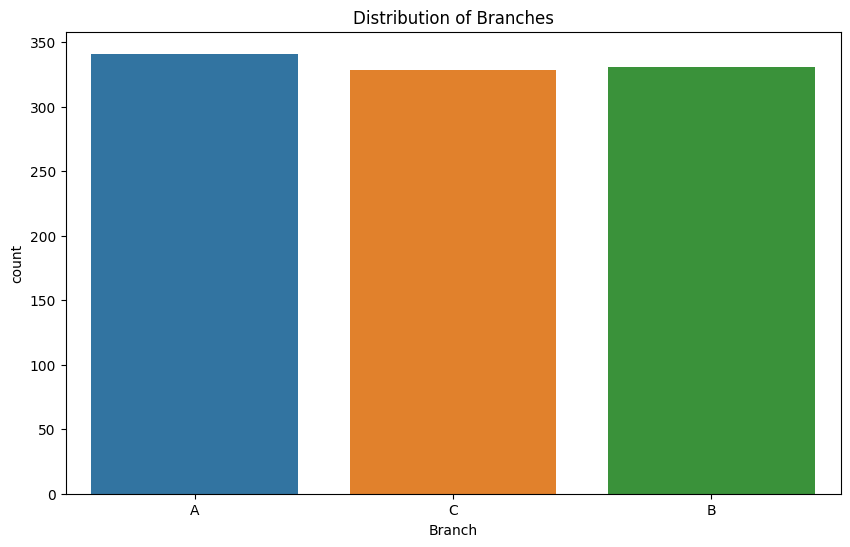

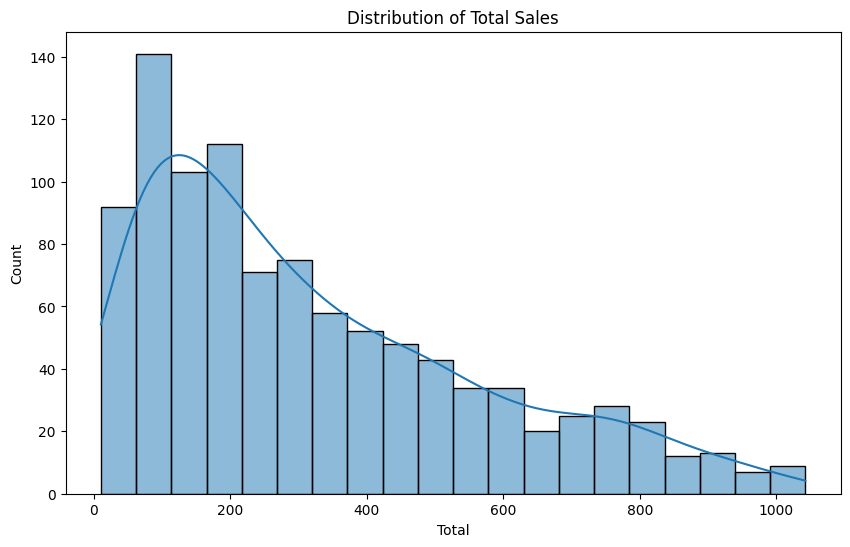

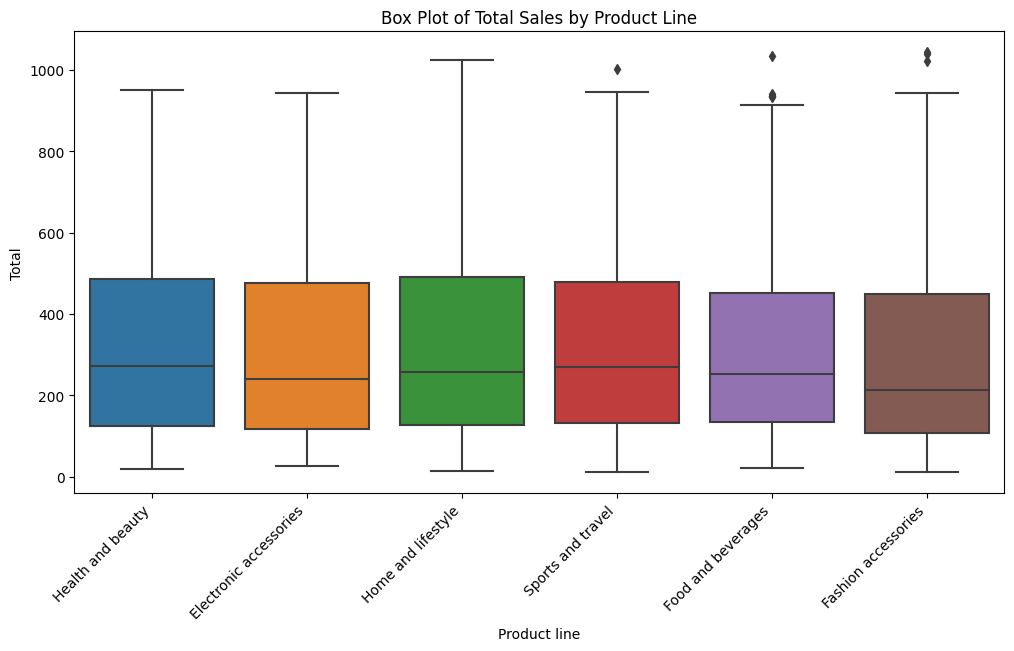

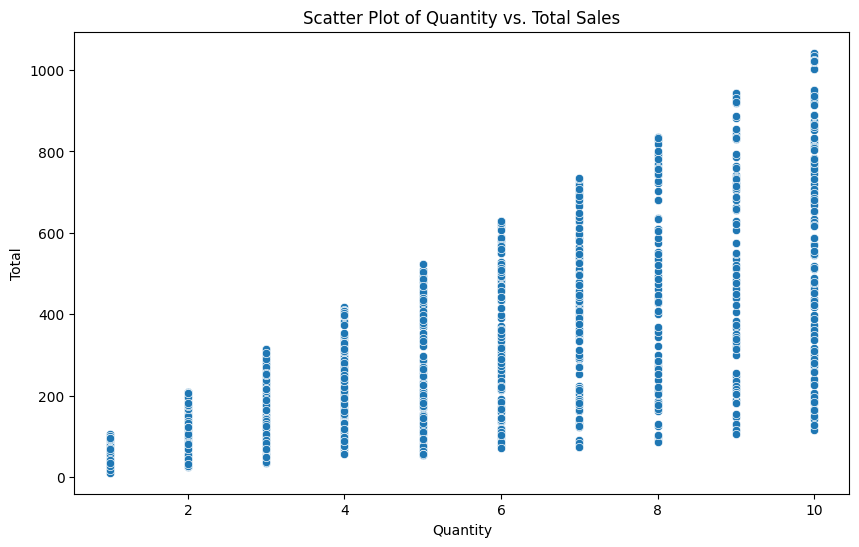

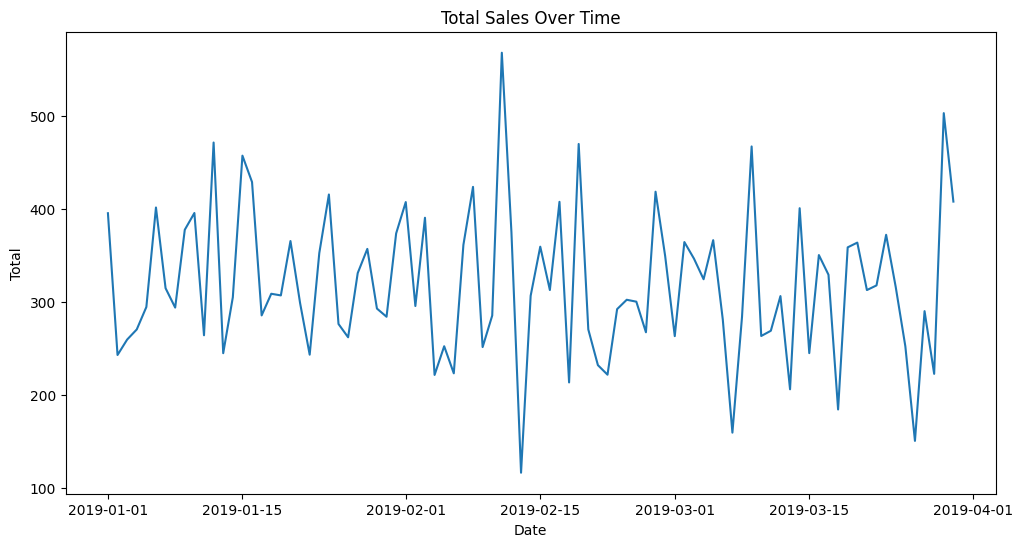

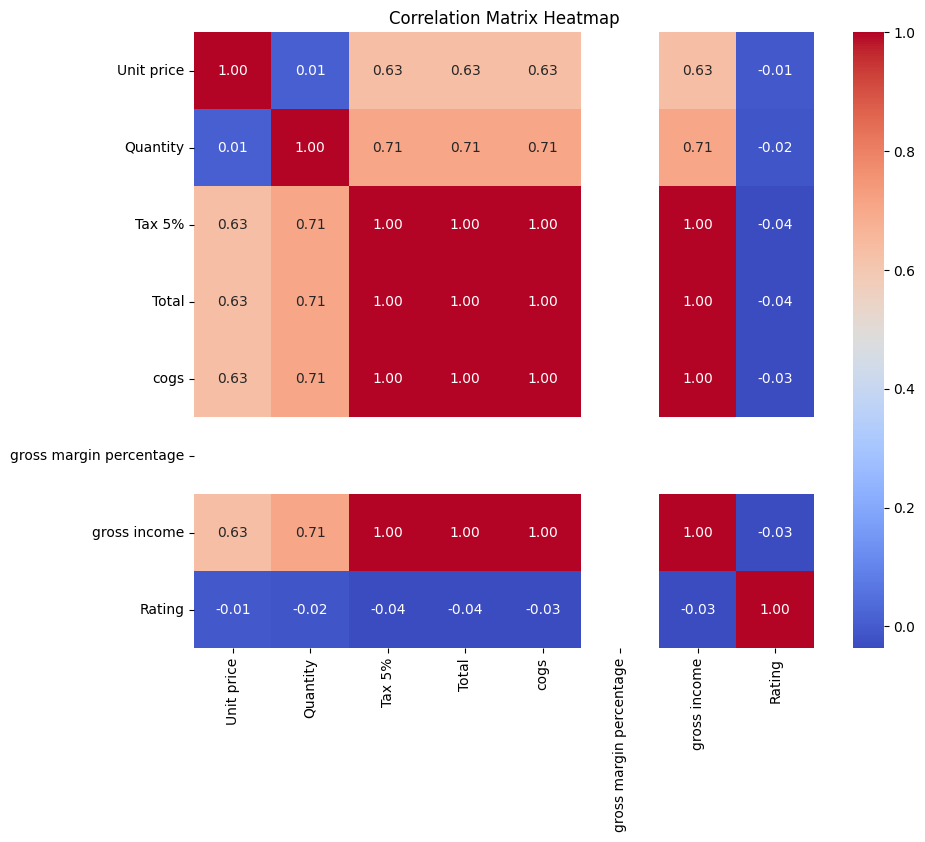

In [30]:
#from helping import plot_bar_chart,plot_box_plot,plot_histogram,plot_scatter,plot_time_series,plot_corr_matrix_heatmap

bar_fig, bar_ax = plot_bar_chart(df, 'Branch', 'Distribution of Branches')
hist_fig, hist_ax = plot_histogram(df, 'Total', title='Distribution of Total Sales')
box_fig, box_ax = plot_box_plot(df, 'Product line', 'Total', 'Box Plot of Total Sales by Product Line')
scatter_fig, scatter_ax = plot_scatter(df, 'Quantity', 'Total', 'Scatter Plot of Quantity vs. Total Sales')
time_series_fig, time_series_ax = plot_time_series(df, 'Date', 'Total', ci=None, title='Total Sales Over Time')
corr_heatmap_fig, corr_heatmap_ax = plot_corr_matrix_heatmap(df)

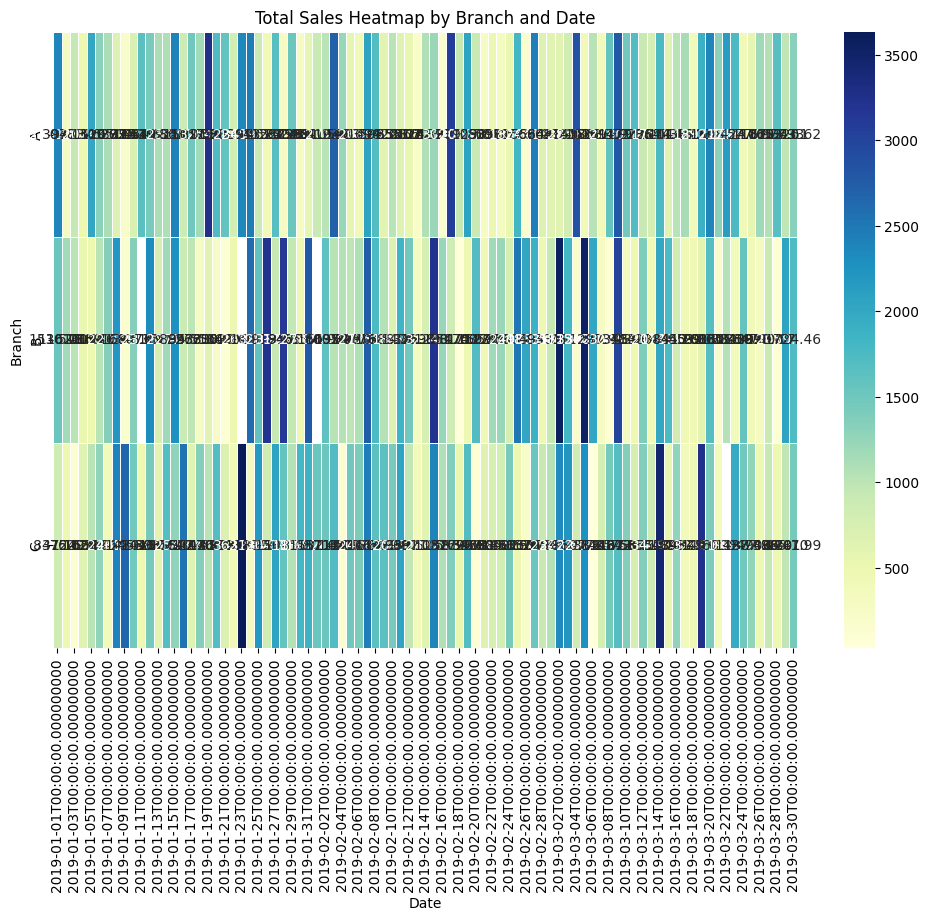

In [31]:
# Create a pivot table for the heatmap
heatmap_data = df.pivot_table(values='Total', index='Branch', columns='Date', aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5)
plt.title('Total Sales Heatmap by Branch and Date')
plt.show()

In [32]:
!pip install geopandas

     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.1 MB 640.0 kB/s eta 0:00:02
     - -------------------------------------- 0.0/1.1 MB 640.0 kB/s eta 0:00:02
     - -------------------------------------- 0.0/1.1 MB 640.0 kB/s eta 0:00:02
     -- ------------------------------------- 0.1/1.1 MB 252.2 kB/s eta 0:00:05
     -- ------------------------------------- 0.1/1.1 MB 305.0 kB/s eta 0:00:04
     --- ------------------------------------ 0.1/1.1 MB 327.7 kB/s eta 0:00:04
     --- ------------------------------------ 0.1/1.1 MB 327.7 kB/s eta 0:00:04
     ---- ----------------------------------- 0.1/1.1 MB 288.1 kB/s eta 0:00:04
     ----- ---------------------------------- 0.2/1.1 MB 350.7 kB/s eta 0:00:03
     ----- ---------------------------------- 0.2/1.1 MB 350.7 kB/s eta 0:00:03
     ----- ---------------------------------- 0.2/1.1 MB 3


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


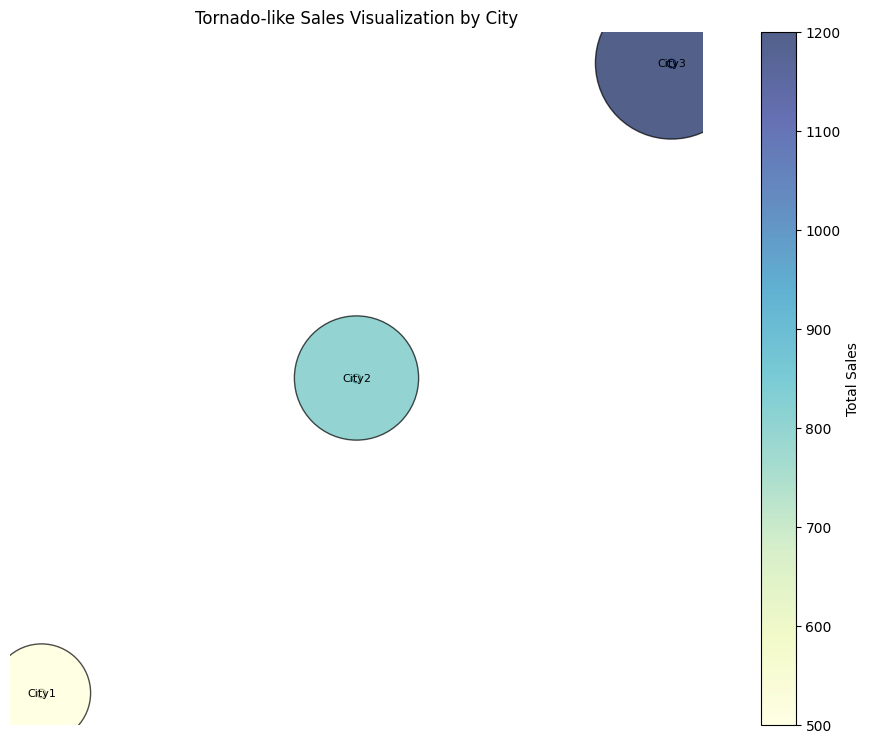

In [38]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a sample GeoDataFrame with city boundaries (hypothetical)
cities_data = {
    'City': ['City1', 'City2', 'City3'],
    'geometry': [Point(1, 1), Point(2, 2), Point(3, 3)]  # Use actual coordinates for your cities
}

cities_gdf = gpd.GeoDataFrame(cities_data, geometry='geometry')

# Merge the GeoDataFrame with sales data
sales_data = {
    'City': ['City1', 'City2', 'City3'],
    'Total Sales': [500, 800, 1200]  # Replace with your actual sales data
}

sales_df = pd.DataFrame(sales_data)

merged_gdf = cities_gdf.merge(sales_df, on='City')

# Plot the tornado-like scatter plot
fig, ax = plt.subplots(figsize=(15, 9))
merged_gdf.plot(ax=ax, color='white', edgecolor='black')  # Plot city boundaries
scatter = ax.scatter(merged_gdf.geometry.x, merged_gdf.geometry.y, c=merged_gdf['Total Sales'],
                     cmap='YlGnBu', s=merged_gdf['Total Sales'] * 10, alpha=0.7, edgecolors='black')

# Add city names
for i, city in merged_gdf.iterrows():
    ax.text(city.geometry.x, city.geometry.y, city['City'], fontsize=8, ha='center', va='center')

# Customize the plot
ax.set_title('Tornado-like Sales Visualization by City')
ax.set_axis_off()
plt.colorbar(scatter, label='Total Sales')
plt.show()
